### Aeolian Activity on Mars

Wind can transport particles over large distances on Mars, leading to the formation of new landforms, dunes and ripples. These processes and their effects on the surface must be taken into account in using impact crater statistics to derive chronologies on Mars. Mapping the locations, relative ages, and orientations of aeolian features can provide insight into Martian weather, climate, and climate history. 

The large martian ripples morphologically similar to terrestrial fluid-drag ripples. If the large martian ripples form as wind-drag ripples, then theory developed for current ripples should predict their scale once adjusted for martian conditions. Experiments have led to scaling relations for current ripples. The analysis of the data indicates that the dimensionless quantities related to the geometry of ripples are functions of two dimensionless variables. One of them must be a combination reflecting the intensity of sediment‐transporting flow, the other must be an arrangement of parameters characterizing the physical nature of the liquid and solid phases involved. According to one of the existing scaling relations, the wavelenth of ripples is inversely proportional to the density of the fluid (e.g. gaseous atmosphere, liquid water) in which solid particles are transported. This relation can be potentially used as a paleoclimate indicator.

Meridiani Planum is a plain located 2 degrees south of Mars's equator, in the westernmost portion of Terra Meridiani. It has been a site of interest for scientists due to its extensive deposits of hematite, a mineral which on Earth forms in the presence of water. The mean elevation of Meridiani Planum is approximately -2 kilometers relative to Mars's mean elevation, also often referred to as the "areoid," which is a shape model of Mars equivalent to Earth's geoid. 

In 2004, the Opportunity rover landed in a small crater in the Meridiani Planum, and its findings have helped scientists to understand more about the plain's geological history and conditions. The Opportunity rover can be found as a black spot marked by a circle in the lower left corner of the image below.

$\textbf{Exercise:}$ Determine orientation and dominant wavelength ($\lambda = 2\pi /k$) of the ripples in Meridiani Planum using FFT transformed HiRISE (High Resolution Imaging Science Experiment) image. Assume that the horizontal size of the image is 400 m. 



In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage import gaussian_filter
from scipy.signal import medfilt2d
import requests
from PIL import Image
from io import BytesIO

In [12]:
# Download and prepare the image
# Downloading the image
url = "https://www.uahirise.org/images/2009/details/cut/ESP_011765_1780_cut.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
# Convert to grayscale and subtract mean
I = np.array(img.convert("L"), dtype=float)
meanI = np.mean(I)
I1 = I - meanI
# Image coordinates
Lx = 400
ny, nx = I1.shape
dx = Lx/nx
x = np.arange(dx/2, dx*nx, dx)
y = np.arange(dx/2, dx*ny, dx)
X, Y = np.meshgrid(x, y)
# Visualization
#plt.figure()
#plt.imshow(I1, extent=[x.min(), x.max(), y.min(), y.max()], aspect=1, cmap='gray')
#plt.xlabel('x [m]'), plt.ylabel('y [m]'), plt.title('Meridiani Planum')

In [13]:
# Make wavenumbers
# Nyquist wavenumbers and intervals
knx = 1/2/dx
kny = 1/2/dx
dkx = 1/dx/nx
dky = 1/dx/ny
# Wavenumber vectors
kx = np.arange(-knx, knx, dkx)
ky = np.arange(-kny, kny, dky)
# Wavenumber 2D grid
KX, KY = np.meshgrid(kx, ky)

In [14]:
# Isotropic Gaussian filtering
# Fourier transformed image
Sv = fftshift(fft2(I1))
ax = 0.1 #smoothing along x-direction
ay = ax #smoothing along y-direction
FLT = np.exp(-(KX**2/ax**2 + KY**2/ay**2)) # Gaussian filter
Sv_flt = Sv * FLT # convolution
I1_flt = np.real(ifft2(ifftshift(Sv_flt))) #convert to spatial domain using inverse FFT
# Residual image and spectrum
I1_res = I1 - I1_flt
Sv_res = Sv - Sv_flt
# By frequency filtering the input image can be decomposed on isotropic componet 
# (looking as a random field with isotropic correlation)
# and a nearly vertical oriented texture 
# (short-wavelength in horizontal direction and long-wavelength in vertical direction) 

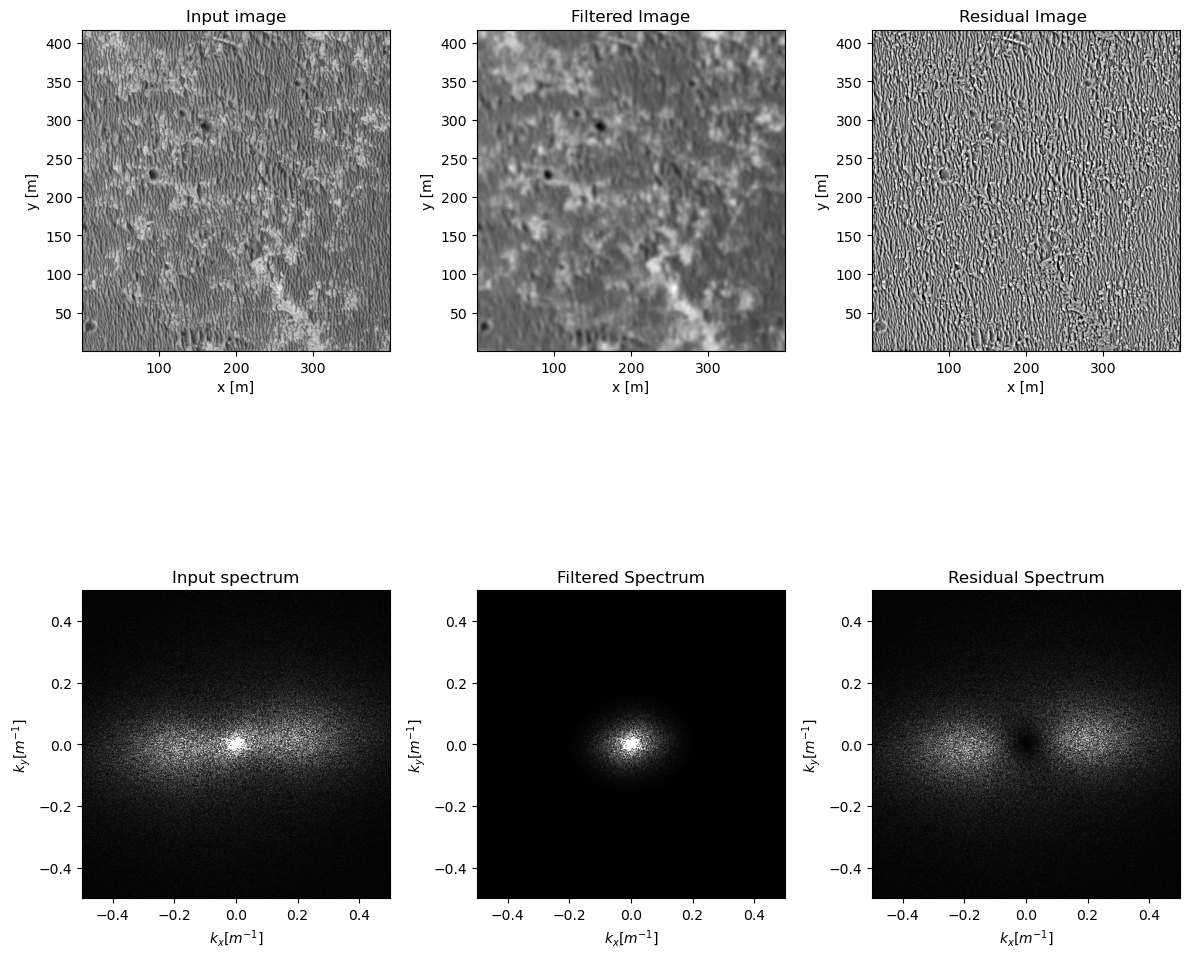

In [17]:

plt.figure(figsize=(12, 12))  # Set figure size
plt.subplot(231)
plt.imshow(I1, extent=[x.min(), x.max(), y.min(), y.max()], aspect='equal', cmap='gray', origin='lower')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Input image')
plt.subplot(232)
plt.imshow(I1_flt, extent=[x.min(), x.max(), y.min(), y.max()], aspect='equal', cmap='gray', origin='lower')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Filtered Image')
plt.subplot(233)
plt.imshow(I1_res, extent=[x.min(), x.max(), y.min(), y.max()], aspect='equal', cmap='gray', origin='lower', vmin=-2*np.std(I1_res), vmax=2*np.std(I1_res))
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Residual Image ')
plt.subplot(234)
plt.imshow(np.abs(Sv), extent=[kx.min(), kx.max(), ky.min(), ky.max()], aspect='equal', cmap='gray', origin='lower', norm=plt.Normalize(0, 1e6))
plt.xlabel(r'$k_x [m^{-1}]$')
plt.ylabel(r'$k_y [m^{-1}]$')
plt.title('Input spectrum')
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.subplot(235)
plt.imshow(np.abs(Sv_flt), extent=[kx.min(), kx.max(), ky.min(), ky.max()], aspect='equal', cmap='gray', origin='lower', norm=plt.Normalize(0, 1e6))
plt.xlabel(r'$k_x [m^{-1}]$')
plt.ylabel(r'$k_y [m^{-1}]$')
plt.title('Filtered Spectrum')
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.subplot(236)
plt.imshow(np.abs(Sv_res), extent=[kx.min(), kx.max(), ky.min(), ky.max()], aspect='equal', cmap='gray', origin='lower', norm=plt.Normalize(0, 1e6))
plt.xlabel(r'$k_x [m^{-1}]$')
plt.ylabel(r'$k_y [m^{-1}]$')
plt.title('Residual Spectrum')
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()  # Display all subplots


In [29]:
# Directional Gaussian filtering
theta = -5 * np.pi / 180  # rotation angle in radians
# Make 2D rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Apply rotation to grids of wavenumbers
# rotation of coordinates clockwise by angle "theta" 
KX1 = R[0, 0] * KX + R[0, 1] * KY
KY1 = R[1, 0] * KX + R[1, 1] * KY

In [30]:
# Directional Gaussian band-pass filtering
# The goal is to cut-out both the central long-wavelength part of the spectrum
# and the strip of the spectrum corresponding to small wavenumbers in the direction of 5degW
# and large wavenumbers in the direction 
ax = 2  # Smoothing along x-direction
ay = 0.1  # Smoothing along y-direction

# Gaussian filter in rotated coordinates
FLT1 = np.exp(-(KX1**2 / ax**2 + KY1**2 / ay**2))
#plt.figure()
#plt.pcolormesh(KX1, KY1, FLT1, shading='auto', cmap='gray')
#plt.axis('equal')
#plt.axis('tight')
# low-pass filter "FLT1" and isotropic low-cut filter "1 - FLT"
# note that FLT is low-pass filter while 1 - FLT is low-cut (high-pass) filter
# convolved with image spectrum Sv
# Note, the combination of two filters is applied by simple multiplication
Sv_flt1 = Sv * FLT1 * (1 - FLT)

# I1_flt1 = real(ifft2(ifftshift(Sv_flt1)));  # convert to spatial domain via inverse FFT
I1_flt1 = np.real(np.fft.ifft2(np.fft.ifftshift(Sv_flt1)))

# Residual image and spectrum
I1_res1 = I1 - I1_flt1
Sv_res1 = Sv - Sv_flt1

# By frequency filtering the input image can be decomposed on isotropic componet 
# (looking as a random field with isotropic correlation)
# and a nearly vertical oriented texture 
# (short-wavelength in horizontal direction and long-wavelength in vertical direction) 
# note, that using directional filtering the isotropic component retain high-frequency component
# other than the nearly vertical fabric

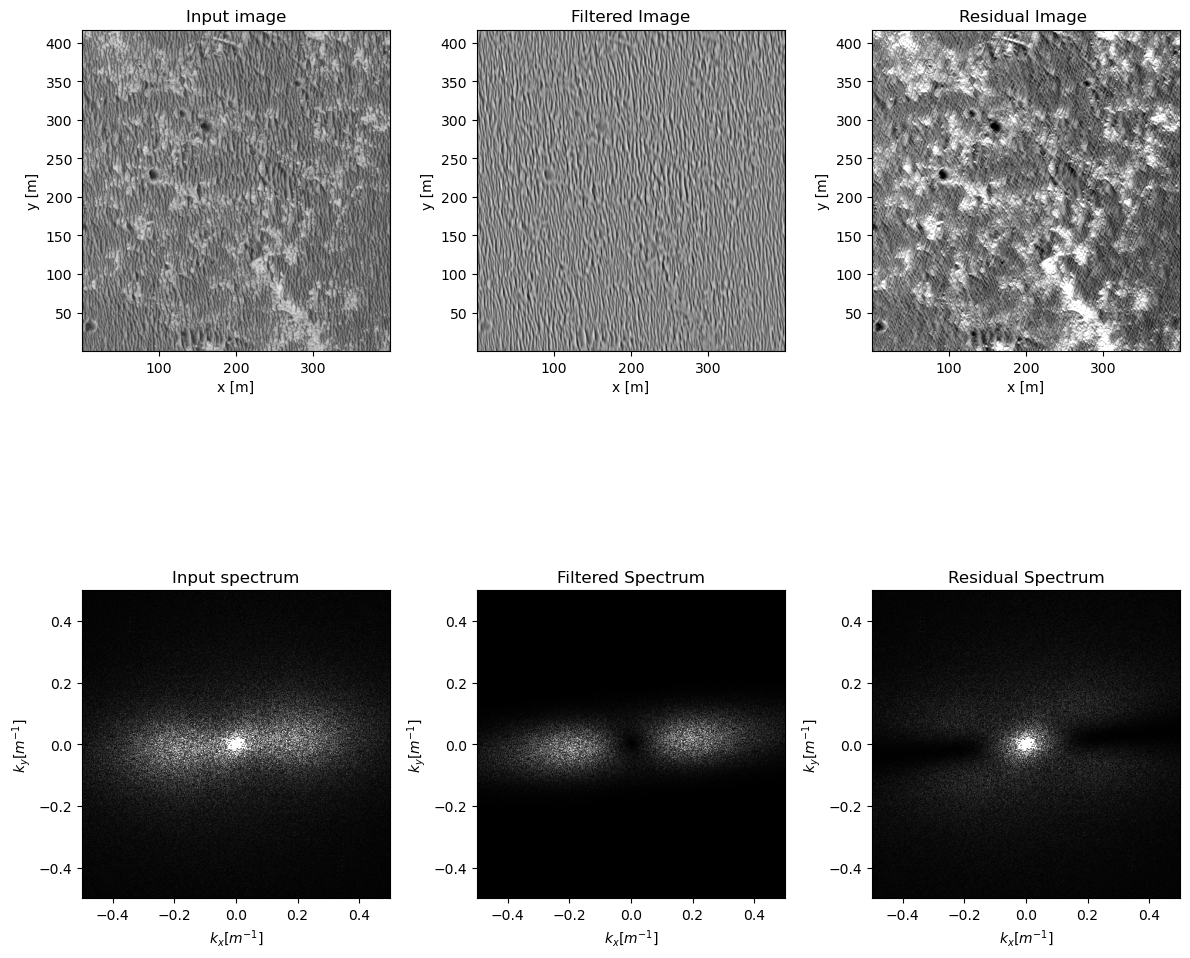

In [31]:
plt.figure(figsize=(12, 12))  # Set figure size
plt.subplot(231)
plt.imshow(I1, extent=[x.min(), x.max(), y.min(), y.max()], aspect='equal', cmap='gray', origin='lower')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Input image')
plt.subplot(232)
plt.imshow(I1_flt1, extent=[x.min(), x.max(), y.min(), y.max()], aspect='equal', cmap='gray', origin='lower')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Filtered Image')
plt.subplot(233)
plt.imshow(I1_res1, extent=[x.min(), x.max(), y.min(), y.max()], aspect='equal', cmap='gray', origin='lower', vmin=-2*np.std(I1_res), vmax=2*np.std(I1_res))
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Residual Image ')
plt.subplot(234)
plt.imshow(np.abs(Sv), extent=[kx.min(), kx.max(), ky.min(), ky.max()], aspect='equal', cmap='gray', origin='lower', norm=plt.Normalize(0, 1e6))
plt.xlabel(r'$k_x [m^{-1}]$')
plt.ylabel(r'$k_y [m^{-1}]$')
plt.title('Input spectrum')
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.subplot(235)
plt.imshow(np.abs(Sv_flt1), extent=[kx.min(), kx.max(), ky.min(), ky.max()], aspect='equal', cmap='gray', origin='lower', norm=plt.Normalize(0, 1e6))
plt.xlabel(r'$k_x [m^{-1}]$')
plt.ylabel(r'$k_y [m^{-1}]$')
plt.title('Filtered Spectrum')
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.subplot(236)
plt.imshow(np.abs(Sv_res1), extent=[kx.min(), kx.max(), ky.min(), ky.max()], aspect='equal', cmap='gray', origin='lower', norm=plt.Normalize(0, 1e6))
plt.xlabel(r'$k_x [m^{-1}]$')
plt.ylabel(r'$k_y [m^{-1}]$')
plt.title('Residual Spectrum')
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()  # Display all subplots

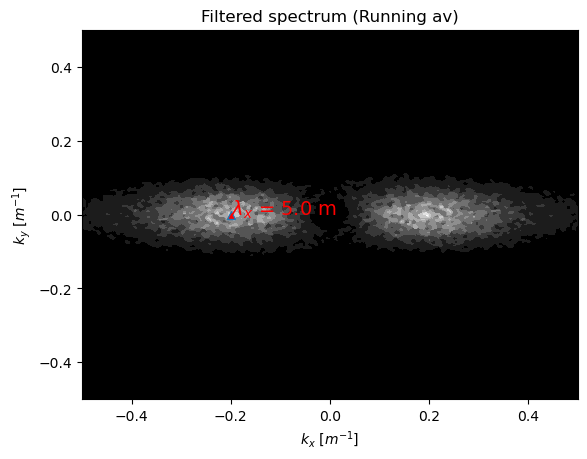

In [50]:
# Find mean orientation and mean wavelength of the ripples
from scipy.signal import medfilt
from matplotlib.colors import ListedColormap

# Smoothing amplitude spectrum using three passes of 3x3 median filter 
Sv_med = medfilt(medfilt(medfilt(abs(Sv_flt1), [3, 3])), [3, 3])

# Find index corresponding to the maximum value of the spectrum
ii = np.argmax(Sv_med)

# Extracting row and column index from ii
row, col = np.unravel_index(ii, Sv_med.shape)

# Creating a figure and axis object
plt.figure()

# Plot smoothed spectrum in rotated coordinates
plt.pcolormesh(KX1, KY1, Sv_med, shading='auto', cmap=ListedColormap(plt.cm.gray(np.linspace(0, 1, 10))))

# Marking the maximum value with a red triangle
plt.plot(KX1[row, col], KY1[row, col], '^', markerfacecolor='r')

# Adding text annotation for dominant wavenumber and wavelength
plt.text(KX1[row, col], KY1[row, col], 
        rf'$\lambda_x$ = {abs(round(1./KX1[row, col], 1))} m',
        color='r', fontsize=14)

# Setting axis properties and labels
plt.axis('equal')
plt.axis('tight')
plt.xlabel('$k_x$ [$m^{-1}$]'), plt.ylabel('$k_y$ [$m^{-1}$]'), 
plt.title('Filtered spectrum (Running av)'), 
plt.xlim([-0.5, 0.5]), plt.ylim([-0.5, 0.5])
plt.show()
